In [44]:
import datetime
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Leemos el dataset
data_lme = pd.read_csv("lme.csv", thousands=",", decimal=".")

data_lme.head()

,Date,Product,Currency,Value
0,21 October 2019,LME Aluminium,US$,1735.5
1,21 October 2019,LME Copper,US$,5820.0
2,21 October 2019,LME Zinc,US$,2500.0
3,21 October 2019,LME Nickel,US$,16200.0
4,21 October 2019,LME Lead,US$,2202.0


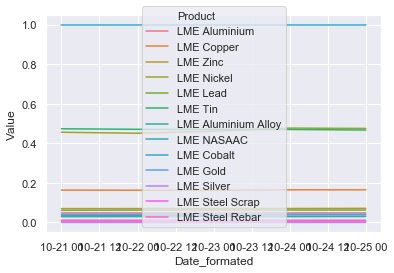

In [75]:
# Creamos una columna con la fecha en formato datatime
data_lme["Date_formated"]=pd.to_datetime(data_lme.Date)

# Normalizamos los precios para que tomen valores entre 0 y 1
# normalizacion = ( x – min(x) ) / ( max(x) – min(x) ) para cada metal

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data_lme.iloc[:, 3:4]) 
x_scaled = pd.DataFrame(x_scaled)
x_scaled["Date"] = data_lme["Date"]
x_scaled["Product"] = data_lme["Product"]
x_scaled["Currency"] = data_lme["Currency"]
x_scaled["Date_formated"] = data_lme["Date_formated"]
x_scaled.columns = ["Value", "Data", "Product", "Currency", "Date_formated"]

x_scaled.head()

sns.lineplot(x="Date_formated", y="Value", hue="Product", data=x_scaled)

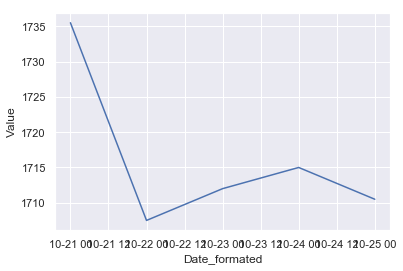

In [42]:
data_aluminium=data_lme[data_lme.Product=="LME Aluminium"]
sns.lineplot(x="Date_formated", y="Value", data=data_aluminium)

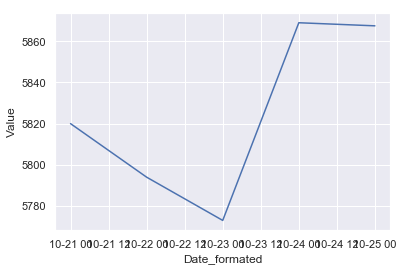

In [43]:
data_copper=data_lme[data_lme.Product=="LME Copper"]
sns.lineplot(x="Date_formated", y="Value", data=data_copper)